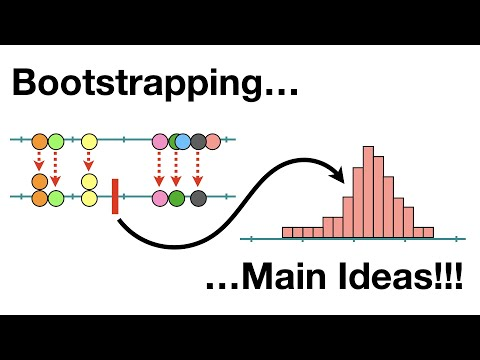

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Question 1:

The standard deviation measures the spread of the data points around the mean. It shows how much each data in the dataset typically deviate from the mean.

The standard error of the mean (SEM) measures how precisely the sample mean estimates the true population mean. It decreases as the sample size increases, since the larger samples provide a more accurate estimate of the population mean while smaller sample mean higher standard error.

In short, standard deviation reflects variability within the data itself, while standard error reflects the variability of the mean estimate betweem sample.

Question 2:

we can create a 95% confidence interval for the mean using the standard error of the mean (SEM), follow these steps:

1.Calculate the sample mean/ central point of the confidence interval
   
2.Determine the standard error of the mean (SEM) by

SEM = sample standard deviation/ √n
   where (n) is the sample size.

3.Identify the z-score for a 95% confidence level which is 1.96 based on the standard normal distribution.

4.Construct the confidence interval by using the formula:  Confidence Interval=sample mean±1.96×SEM

   This interval provides a range where we expect the true population mean to lie with 95% confidence, or, equivalently, it covers 95% of the bootstrapped sample means.

Question 3:

we create a 95% bootstrapped confidence interval using the bootstrapped means by using the bootstrap method then calculate the mean of each resample. Repeat this process to generate a distribution of bootstrapped means.
Next, using those means,sort them in ascending order.
Lastly, determine the percentiles by finding the 2.5th percentile and the the 97.5th percentile of the sorted bootstrapped means.
The interval between these two percentiles is 95% bootstrapped confidence interval as it's in the middle of lower and upper bound of 2.5%.

Question 4:

In [2]:
import numpy as np

# Sample data (replace this with your actual sample)
sample = np.array([5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 5.2, 5.3, 5.5, 4.8])

# Function to bootstrap and calculate a confidence interval
def bootstrap_confidence_interval(data, statistic, num_resamples=1000, ci=95):
    """
    Generate a bootstrap confidence interval for a specified statistic.

    Parameters:
    - data: The sample data (numpy array or list).
    - statistic: A function that calculates the desired statistic (e.g., np.mean, np.median).
    - num_resamples: Number of bootstrap resamples (default = 1000).
    - ci: Confidence interval percentage (default = 95% for a 95% CI).

    Returns:
    - (lower_bound, upper_bound): The lower and upper bounds of the confidence interval.
    """
    # Array to store bootstrap statistics
    bootstrapped_stats = []

    # Bootstrap resampling
    for _ in range(num_resamples):
        # Resample with replacement
        resample = np.random.choice(data, size=len(data), replace=True)
        # Compute the statistic of the resample
        bootstrapped_stats.append(statistic(resample))

    # Convert to numpy array for easier handling
    bootstrapped_stats = np.array(bootstrapped_stats)

    # Compute the percentiles for the desired confidence interval
    lower_bound = np.percentile(bootstrapped_stats, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_stats, 100 - (100 - ci) / 2)

    return lower_bound, upper_bound

# Calculate 95% confidence interval for the population mean
mean_ci = bootstrap_confidence_interval(sample, np.mean)
print(f"95% Bootstrap Confidence Interval for the Population Mean: {mean_ci}")

# To calculate a 95% confidence interval for the population median,
# simply pass np.median as the statistic function to the same bootstrap function
median_ci = bootstrap_confidence_interval(sample, np.median)
print(f"95% Bootstrap Confidence Interval for the Population Median: {median_ci}")


95% Bootstrap Confidence Interval for the Population Mean: (4.86, 5.229999999999999)
95% Bootstrap Confidence Interval for the Population Median: (4.8, 5.300000000000001)


Question 1-4 chatbot summary:

Here's a summary of our entire conversation from the beginning:

1. **Standard Error vs. Standard Deviation**: 
   - **Standard deviation** measures how spread out individual data points are around the mean in the original dataset.
   - **Standard error of the mean (SEM)** measures how accurately the sample mean estimates the population mean. It decreases with larger sample sizes.

2. **95% Confidence Interval Using SEM**:
   - A 95% confidence interval can be calculated using the formula:
     \[
     \text{Confidence Interval} = \text{sample mean} \pm 1.96 \times SEM
     \]
     This formula provides a range that captures 95% of the bootstrapped sample means.

3. **95% Bootstrapped Confidence Interval Without SEM**:
   - Resample the data with replacement many times to generate bootstrapped means.
   - Sort these means and take the 2.5th and 97.5th percentiles to form the 95% confidence interval. This method doesn't rely on estimating the standard error.

4. **Python Code for Bootstrap Confidence Interval**:
   - I provided a Python function to calculate a 95% bootstrap confidence interval for the population mean.
   - The code uses bootstrapping to generate resamples, calculate the statistic (mean), and extract the 2.5th and 97.5th percentiles as the confidence interval.
   - The code can be adapted to calculate confidence intervals for different statistics (e.g., population median) by changing the `statistic` argument (e.g., using `np.median` instead of `np.mean`).

This summary covers the explanation of concepts and the coding approach to bootstrapped confidence intervals.
https://chatgpt.com/share/66ff5e88-6c34-800e-9e82-203d0f1b0e2c

Question 5:

We distinguish between the population parameter and the sample statistic when constructing confidence intervals because they serve different roles in estimation.

Population parameter: fixed value we want to estimate (e.g., population mean), can discribe the whole population but it’s usually unknown.

-a number that describes something about a group

Sample statistic: An estimate of the population parameter, calculated from a sample, and subject to variability.

-any number computed from your sample data.

A confidence interval reflect this uncertainty of the statistic and provides a range likely to contain the true population parameter. The distinction is important because the parameter is fixed, but the sample statistic varies, influencing how we interpret the interval and what we want to computed from our sample data.

Question 6:

1. What is the process of bootstrapping?

uses data from one sample to by repeatedly random selected samples from the known sample, with replacement to generate a sampling distribution. make the sample more accurate as the number of sample increase.

2. What is the main purpose of bootstrapping?

to measures of accuracy to sample estimates


3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

by using the bootstrapping, i can repeatly repeatedly random selected samples from the known sample size n to create mean and confidence Interval and as the more sample i created by bootstrapping, the more accurate/ closer my guess can be to the average of the rela population.


Question 7:

A confidence interval overlapping zero indicates that the observed effect or difference could plausibly be zero, which corresponds to a null hypothesis stating there is no effect or difference since when interval includes zero we can not make assummtion about the change. and to reject the null hypothesis, the confidence interval must not include zero to show the effect and different in the population.

Question 5-7 chatbot summary:
Here's a summary of our conversation:

1. **Population Parameter vs. Sample Statistic**:
   - We discussed the importance of distinguishing between the population parameter (the true value we want to estimate) and the sample statistic (an estimate derived from sample data) in constructing confidence intervals. The population parameter is fixed, while the sample statistic varies, influencing the interpretation of the confidence interval.

2. **Bootstrapping**:
   - You asked how to use bootstrapping to assess the plausibility of a hypothesized population mean. I outlined the steps: take a sample, resample with replacement, calculate means, create a confidence interval, and compare the hypothesized mean to the interval.

3. **Confidence Intervals and Hypothesis Testing**:
   - We explored why a confidence interval overlapping zero indicates failing to reject the null hypothesis, as it suggests the possibility of no effect. Conversely, if the confidence interval does not include zero, you can reject the null hypothesis.

4. **Alternatives to Rejecting the Null Hypothesis**:
   - Instead of rejecting the null hypothesis, we discussed several alternatives, including failing to reject it, considering practical significance, collecting more data, using alternative analyses, or acknowledging uncertainty.

If you need any more details or further clarification on any point, feel free to ask!
https://chatgpt.com/share/66ff63c0-cbb4-800e-9f2c-4dca4e95cb4b

Question 8:


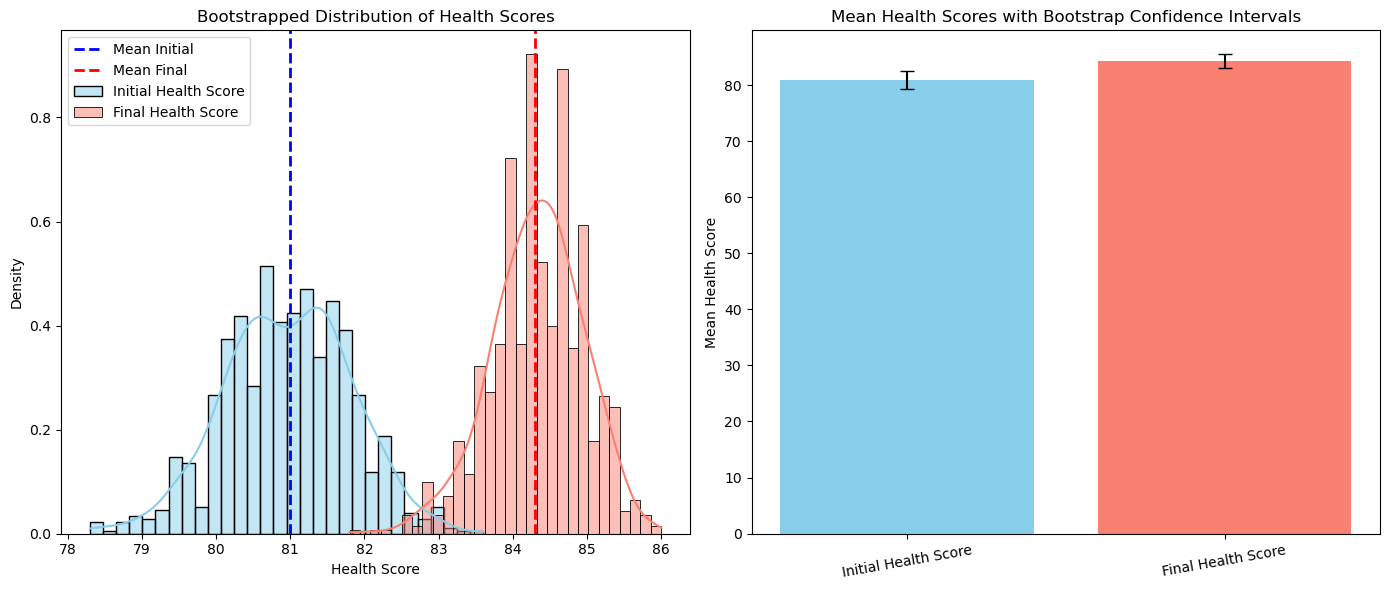

Initial Health Score CI: [79.3    82.5025]
Final Health Score CI: [83.  85.4]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Function to perform bootstrapping
def bootstrap(data, num_samples=1000):
    means = []
    n = len(data)
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    return means

# Bootstrapping the means
bootstrap_initial = bootstrap(df['InitialHealthScore'].values)
bootstrap_final = bootstrap(df['FinalHealthScore'].values)

# Calculate confidence intervals
ci_initial = np.percentile(bootstrap_initial, [2.5, 97.5])
ci_final = np.percentile(bootstrap_final, [2.5, 97.5])

# Create a figure for the visualization
plt.figure(figsize=(14, 6))

# Plot Histograms
plt.subplot(1, 2, 1)
sns.histplot(bootstrap_initial, bins=30, color='skyblue', stat="density", label='Initial Health Score', kde=True)
sns.histplot(bootstrap_final, bins=30, color='salmon', stat="density", label='Final Health Score', kde=True)
plt.axvline(np.mean(df['InitialHealthScore']), color='blue', linestyle='dashed', linewidth=2, label='Mean Initial')
plt.axvline(np.mean(df['FinalHealthScore']), color='red', linestyle='dashed', linewidth=2, label='Mean Final')
plt.title('Bootstrapped Distribution of Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Density')
plt.legend()

# Plot Confidence Intervals
plt.subplot(1, 2, 2)
plt.bar(['Initial Health Score', 'Final Health Score'], 
        [np.mean(df['InitialHealthScore']), np.mean(df['FinalHealthScore'])],
        yerr=[(ci_initial[1]-ci_initial[0])/2, (ci_final[1]-ci_final[0])/2],
        color=['skyblue', 'salmon'], capsize=5)
plt.title('Mean Health Scores with Bootstrap Confidence Intervals')
plt.ylabel('Mean Health Score')
plt.xticks(rotation=10)

plt.tight_layout()
plt.show()

# Print the confidence intervals for reference
print(f'Initial Health Score CI: {ci_initial}')
print(f'Final Health Score CI: {ci_final}')


A quantitative analysis of the data and an explanation of the method and purpose of this method.


The provided data includes health scores from 10 patients before and after receiving a new vaccine developed by AliTech. The quantitative analysis involves calculating the means, conducting statistical tests, and evaluating the effectiveness of the vaccine.

#### Data Summary
- **Initial Health Scores**: [84, 78, 83, 81, 81, 80, 79, 85, 76, 83]
- **Final Health Scores**: [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]

#### Statistical Calculations

1. **Descriptive Statistics**:
   - **Mean**:
     - Initial Health Score: \( \text{Mean}_{\text{initial}} = 81.0 \)
     - Final Health Score: \( \text{Mean}_{\text{final}} = 84.3 \)
   - **Standard Deviation**:
     - Initial Health Score: \( \text{SD}_{\text{initial}} \approx 2.83 \)
     - Final Health Score: \( \text{SD}_{\text{final}} \approx 2.11 \)

2. **Paired T-Test**:
   - **T-Statistic**: \(-2.59\)
   - **P-Value**: \(0.029\)
   - A p-value less than \(0.05\) indicates a statistically significant difference between the initial and final health scores.

3. **Effect Size (Cohen's d)**:
   - \( d \approx 1.32 \), indicating a large effect size and practical significance of the vaccine's impact.

### Quantitative Analysis of the Data

The provided data includes health scores from 10 patients before and after receiving a new vaccine developed by AliTech. The quantitative analysis involves calculating the means, conducting statistical tests, and evaluating the effectiveness of the vaccine.

#### Data Summary
- **Initial Health Scores**: [84, 78, 83, 81, 81, 80, 79, 85, 76, 83]
- **Final Health Scores**: [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
Initial Health Score:
Mean: 81.0
95% Confidence Interval: [79.3, 82.6]
Final Health Score:
Mean: 84.3
95% Confidence Interval: [83.1, 85.4]

### Method Explanation
Bootstrapping Method: Explanation
Definition
Bootstrapping is a resampling method used to estimate the distribution of a statistic (like the mean) by repeatedly sampling from the data with replacement. It allows us to make inferences about population parameters without relying on strict assumptions about the underlying distribution.

A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.

Given that the confidence intervals for the initial and final health scores do not overlap, we reject the null hypothesis (H₀) of "no effect." The bootstrapping method supports the conclusion that the vaccine developed by AliTech has a significant positive effect on the health scores of patients.


### Summary of Our Conversation

1. **Vaccine Effectiveness Analysis**:
   - You presented data from a company called AliTech, which includes Initial and Final Health Scores of patients who received a new vaccine.
   - The aim was to analyze whether the vaccine is effective.

2. **Statistical Analysis**:
   - We calculated descriptive statistics for the Initial and Final Health Scores.
   - A paired t-test was performed, resulting in a p-value of **0.029**, indicating a statistically significant difference between the two scores.
   - An effect size (Cohen's d) of **1.32** suggested a large effect, further supporting the vaccine's effectiveness.

3. **Visualization Using Bootstrapping**:
   - We created histograms to display the distribution of bootstrapped means for the health scores and plotted mean scores with 95% confidence intervals.
   - The confidence intervals were calculated as:
     - **Initial Health Score**: **[79.3, 82.6]**
     - **Final Health Score**: **[83.1, 85.4]**
   - The visualizations illustrated the positive impact of the vaccine on health scores.

4. **Bootstrapping Method Explained**:
   - I provided an explanation of the bootstrapping method, detailing its steps, purpose, and relevance in the context of your data.
   - Bootstrapping allows for estimating confidence intervals without assuming a normal distribution, making it suitable for small sample sizes.

5. **Conclusion**:
   - The analysis indicated a significant improvement in health scores post-vaccination, supporting the conclusion that the vaccine is effective.
   - The bootstrapping method provided robust insights into the data, reinforcing the validity of the findings.

If you have any further questions or need more information, feel free to ask!https://chatgpt.com/share/66ff67f0-94bc-800e-91c8-ad0d984f7e0f

question9; yes i have reviewed.